<a href="https://colab.research.google.com/github/BhavyaBansal49/Fake-News-Detection/blob/main/Fake_News_Detection_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About the dataset:


1.   id: unique id for a news article
2.   title: the title of a news article
3.   author: author of the news article
4.   text: the text of the article, could be incomplete
5.   label: a label that marks whether the news article is real or fake

###Setting up the environment

In [33]:
#import libraries
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
#download stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
#checking the stop words for english language
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

### Data Pre-Processing

In [4]:
#reading the csv file into a pandas dataframe
news_df = pd.read_csv('/content/drive/MyDrive/Project/Fake News Detection/train.csv')

In [5]:
#check the number of rows and column in the dataset
news_df.shape

(20800, 5)

In [6]:
#checking the first 5 rows of the dataframe
news_df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [7]:
#checking for missing values
news_df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [8]:
#replacing the missing values with empty strings
news_df =  news_df.fillna('')

In [9]:
#merging the author and news title column
news_df['content'] = news_df['author']+' '+news_df['title']

In [10]:
#check for the new column
print(news_df['content'].head())

0    Darrell Lucus House Dem Aide: We Didn’t Even S...
1    Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2    Consortiumnews.com Why the Truth Might Get You...
3    Jessica Purkiss 15 Civilians Killed In Single ...
4    Howard Portnoy Iranian woman jailed for fictio...
Name: content, dtype: object


In [11]:
#separating the data & label
X = news_df.drop('label', axis=1)
Y = news_df['label']

In [12]:
#print X and Y
print(X.head())
print(Y.head())

   id  ...                                            content
0   0  ...  Darrell Lucus House Dem Aide: We Didn’t Even S...
1   1  ...  Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2   2  ...  Consortiumnews.com Why the Truth Might Get You...
3   3  ...  Jessica Purkiss 15 Civilians Killed In Single ...
4   4  ...  Howard Portnoy Iranian woman jailed for fictio...

[5 rows x 5 columns]
0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64


### Stemming

In [14]:
#create a variable for the stemmer function
porter_stem = PorterStemmer()

In [15]:
#define a function for stemming
def stemming(content):
  stemmed_content = re.sub('[^a-zA-Z]',' ',content)
  stemmed_content = stemmed_content.lower()
  stemmed_content = stemmed_content.split()
  stemmed_content = [porter_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
  stemmed_content = ' '.join(stemmed_content)
  return stemmed_content

In [16]:
#apply the function to the content column
news_df['content'] = news_df['content'].apply(stemming)

In [18]:
#print the new content column
print(news_df['content'].head())

0    darrel lucu hous dem aid even see comey letter...
1    daniel j flynn flynn hillari clinton big woman...
2               consortiumnew com truth might get fire
3    jessica purkiss civilian kill singl us airstri...
4    howard portnoy iranian woman jail fiction unpu...
Name: content, dtype: object


### Create new dependent and independent columns into X and Y

In [19]:
#separating data and label
X = news_df['content'].values
Y = news_df['label'].values

In [21]:
#print the head to check
print(X)
print(Y)

['darrel lucu hous dem aid even see comey letter jason chaffetz tweet'
 'daniel j flynn flynn hillari clinton big woman campu breitbart'
 'consortiumnew com truth might get fire' ...
 'michael j de la merc rachel abram maci said receiv takeov approach hudson bay new york time'
 'alex ansari nato russia hold parallel exercis balkan'
 'david swanson keep f aliv']
[1 0 1 ... 0 1 1]


### Vectorization of the textual data

In [22]:
#converting the textual data to numerical data
vectorizer = TfidfVectorizer()
vectorizer.fit(X)
X = vectorizer.transform(X)

### Split data into Train and Test

In [25]:
#keep 20% as test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, stratify= Y, random_state= 4)

### Training the models

In [27]:
#Train Logistic Regression Model
model = LogisticRegression()

In [28]:
#Fitting the model
model.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Evaluating model performance

In [29]:
#Using accuracy score
#Using training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [30]:
print('Accuracy score of the training data: ', training_data_accuracy)

Accuracy score of the training data:  0.9870793269230769


In [31]:
#Using test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the test data: ', test_data_accuracy)

Accuracy score of the test data:  0.9742788461538462


### Confusion Matrix

In [35]:
#Create the confusion matrix and save it in a variable
conmat = confusion_matrix(Y_test, X_test_prediction)

In [37]:
#Create a dataframe for the confusion matrix
val = np.mat(conmat)
classnames = list(set(Y_train))
df_cm = pd.DataFrame(val, index= classnames, columns= classnames)

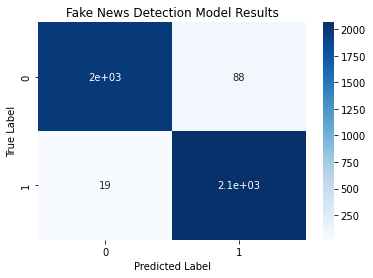

In [41]:
#Using seaborn to create a gradient graph
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()

heatmap = sns.heatmap(df_cm, annot= True, cmap="Blues")

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Fake News Detection Model Results')
plt.show()